#Insights SF salary Data

##Explore and Clean

In [14]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('chained_assignment',None)

salary = pd.read_csv("/Users/matthu24/.spyder2-py3/salaries.csv",low_memory=False)
print(salary.head(4))

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18           0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3      77916    56120.71   198306.9      NaN  332343.61         332343.61   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN  
2  2011    NaN  San Francisco    NaN  
3  2011    NaN  San Francisco    NaN  


In [2]:
salary.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
null_count_columns = salary.isnull().sum()
print(null_count_columns)

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64


Eliminate rows where base pay is either blank or "not provided".  Also change base pay type to float.

In [4]:
salary["BasePay"] = salary["BasePay"].fillna(0)
salary = salary[(salary["BasePay"]!="Not Provided")&(salary["BasePay"]!=0)]
salary["BasePay"] = salary["BasePay"].astype(float)

Eliminate rows where base pay is negative.

In [5]:
neg_basepay = salary[salary["BasePay"]<=0]
#filter out negative pay
salary = salary[(salary["BasePay"]>0)]

six pay categories: basepay, overtimepay, otherpay,benefits, 
totalpay,totalpaybenefits
Pay formula: BasePay + OvertimePay + OtherPay = TotalPay
TotalPay + Benefits = TotalPayBenefits

Change overtime pay, other pay, and benefits to float data types.  Check for missing values again and use describe method.

In [6]:
salary["OvertimePay"] = salary["OvertimePay"].astype(float)
salary["OtherPay"] = salary["OtherPay"].astype(float)
salary["Benefits"] = salary["Benefits"].astype(float)

missing_values = salary.isnull().sum()
print(missing_values)
describe = salary.describe()
print(describe)

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             35707
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               146736
Agency                   0
Status              109043
dtype: int64
                  Id        BasePay    OvertimePay       OtherPay  \
count  146736.000000  146736.000000  146736.000000  146736.000000   
mean    74116.255322   66917.130321    5130.611405    3638.405132   
std     42906.012688   42491.578949   11513.508640    7964.167855   
min         1.000000       6.040000      -0.010000   -7058.590000   
25%     37136.750000   35411.025000       0.000000       0.000000   
50%     74251.500000   65258.010000       0.000000     809.710000   
75%    111540.250000   94984.072500    4768.055000    4250.000000   
max    148621.000000  319275.010000  245131.880000  400184.250000   

            Be

##Analyze

1. What is the base pay distribution in SF?

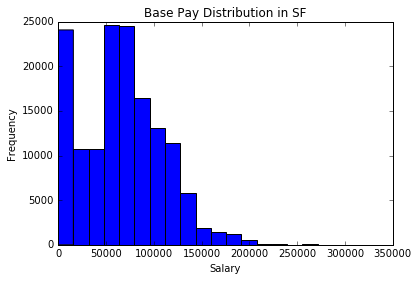

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(salary["BasePay"],bins = 20)
plt.title("Base Pay Distribution in SF")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

2. How did the average salary change over time in SF?

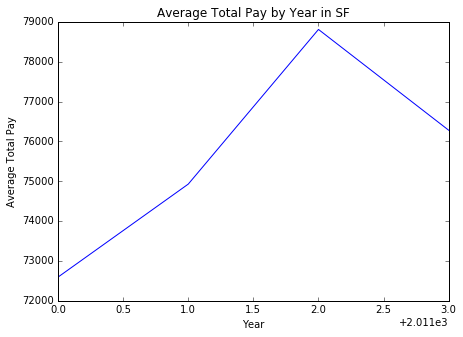

In [8]:
#Average total pay by year in SF
Year_totalPay = pd.DataFrame(salary[["Year","TotalPay"]])
#PIVOT TABLE USES "VALUES" IF WANT TO SUM THE ACTUAL VALUES IN THE SECOND COLUMN(NONINDEX COLUMN)
#PIVOT TABLE USES "COLUMNS" IF WANT TO JUST COUNT THE NUMBER OF OCCURRENCES
Year_totalPay_pivot = pd.pivot_table(Year_totalPay,index = 'Year',values = ['TotalPay'], aggfunc=np.mean )
Years = salary["Year"].value_counts()

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
ax.plot(Year_totalPay_pivot.index, Year_totalPay_pivot.values)

plt.title('Average Total Pay by Year in SF')
plt.xlabel("Year")
plt.ylabel("Average Total Pay")
plt.show()


3. Break up the data into job categories, and graph the number of people in each job for 2012.

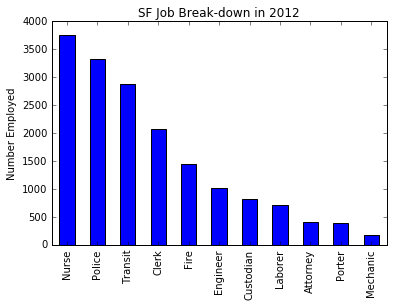

In [9]:
#job categories
Job_counts = salary["JobTitle"].value_counts()
#Job groups: 
#transit/TRANSIT, Nurse/NURSE/Patient Care, Public Svc/Public Service, 
#Custodian, Police/Deputy, Fire, Recreation,Attorney, Porter, Sergeant,
#Laborer, Gardener, Parking, Clerk, Engineer, Analyst

def job_category(jobTitle):
    newJobTitle = jobTitle
    if "TRANSIT" in jobTitle:
        newJobTitle = "Transit"
    elif "Transit" in jobTitle:
        newJobTitle = "Transit"
    elif "NURSE" in jobTitle:
        newJobTitle = "Nurse"
    elif "Nurse" in jobTitle:
        newJobTitle = "Nurse"
    elif "PATIENT CARE" in jobTitle:
        newJobTitle = "Nurse"
    elif "Patient care" in jobTitle:
        newJobTitle = "Nurse"
    elif "MEDICAL" in jobTitle:
        newJobTitle = "Nurse"
    elif "Medical" in jobTitle:
        newJobTitle = "Nurse"
    elif "CUSTODIAN" in jobTitle:
        newJobTitle = "Custodian"
    elif "Custodian" in jobTitle:
        newJobTitle = "Custodian"
    elif "FIRE" in jobTitle:
        newJobTitle = "Fire"
    elif "Fire" in jobTitle:
        newJobTitle = "Fire"
    elif "FIREFIGHTER" in jobTitle:
        newJobTitle = "Fire"
    elif "Firefighter" in jobTitle:
        newJobTitle = "Firefighter"
    elif "POLICE" in jobTitle:
        newJobTitle = "Police"
    elif "Police" in jobTitle:
        newJobTitle = "Police"
    elif "DEPUTY" in jobTitle:
        newJobTitle = "Police"
    elif "Deputy" in jobTitle:
        newJobTitle = "Police"
    elif "CLERK" in jobTitle:
        newJobTitle = "Clerk"
    elif "Clerk" in jobTitle:
        newJobTitle = "Clerk"
    elif "ATTORNEY" in jobTitle:
        newJobTitle = "Attorney"
    elif "Attorney" in jobTitle:
        newJobTitle = "Attorney"
    elif "PUBLIC SVC" in jobTitle:
        newJobTitle = "Public Service"
    elif "Public svc" in jobTitle:
        newJobTitle = "Public Service"
    elif "PUBLIC SERVICE" in jobTitle:
        newJobTitle = "Public Service"
    elif "RECREATION" in jobTitle:
        newJobTitle = "Recreation"
    elif "Recreaction" in jobTitle:
        newJobTitle = "Recreation"
    elif "PORTER" in jobTitle:
        newJobTitle = "Porter"
    elif "Porter" in jobTitle:
        newJobTitle = "Porter"
    elif "LABORER" in jobTitle:
        newJobTitle = "Laborer"
    elif "Laborer" in jobTitle:
        newJobTitle = "Laborer"
    elif "GARDENER" in jobTitle:
        newJobTitle = "Laborer"
    elif "Gardener" in jobTitle:
        newJobTitle = "Laborer"
    elif "PARKING CONTROL" in jobTitle:
        newJobTitle = "Police"
    elif "Parking Control" in jobTitle:
        newJobTitle = "Police"
    elif "ENGINEER" in jobTitle:
        newJobTitle = "Engineer"
    elif "Engineer" in jobTitle:
        newJobTitle = "Engineer"
    elif "MECHANIC" in jobTitle:
        newJobTitle = "Mechanic"
    elif "Mechanic" in jobTitle:
        newJobTitle = "Mechanic"
    else:
        newJobTitle = "Other"
    return newJobTitle
    
salary_2012= salary[salary["Year"] == 2012]
salary_2012["JobCategory"]=salary_2012["JobTitle"].map(lambda x: job_category(x))

job_category_count_2012 = salary_2012["JobCategory"].value_counts()
#take out the "other"
job_category_count_2012 = job_category_count_2012.iloc[1:]
job_category_count_2012.plot(kind = 'bar')
plt.ylabel("Number Employed")
plt.title("SF Job Break-down in 2012")
plt.show()
#do job category count for all four years
salary["JobCategory"]=salary["JobTitle"].map(lambda x: job_category(x))

4. How are base pay, overtime pay, and benefits allocated among the different job groups?

In [10]:
#mean average total PAY by occupation for four years
job_categories_df = pd.DataFrame({"Jobs":job_category_count_2012.index})

#apply fcn on category list
def salary_by_category(job_category):
    #filter out salary2012 based on jobcategory
    category_filter = salary[salary["JobCategory"] == job_category]
    mean_salary = category_filter["TotalPay"].mean()
    return mean_salary

#do same but break up into 1. base pay, 2. overtime, 3. benefits
#job_categories_2012_df = pd.DataFrame({"Jobs":job_category_count_2012.index})

#apply fcn on category list
def basepay_by_category(job_category):
    #filter out salary2012 based on jobcategory
    category_filter = salary[salary["JobCategory"] == job_category]
    base_pay = category_filter["BasePay"].mean()
    return base_pay

def overtime_by_category(job_category):
    #filter out salary2012 based on jobcategory
    category_filter = salary[salary["JobCategory"] == job_category]
    base_pay = category_filter["OvertimePay"].mean()
    return base_pay
    
def benefits_by_category(job_category):
    #filter out salary2012 based on jobcategory
    category_filter = salary[salary["JobCategory"] == job_category]
    base_pay = category_filter["Benefits"].mean()
    return base_pay

print(job_categories_df)


         Jobs
0       Nurse
1      Police
2     Transit
3       Clerk
4        Fire
5    Engineer
6   Custodian
7     Laborer
8    Attorney
9      Porter
10   Mechanic


Create job categories DF, which has columns for mean base pay, overtime pay, and benefits.

                Jobs   MeanTotalPay    MeanBasePay  MeanOvertimePay  \
Jobs                                                                  
Nurse          Nurse   73282.154108   66027.959079      2338.770752   
Police        Police  109546.605705   91085.425766     10712.185078   
Transit      Transit   72593.453312   56401.095205     13420.498632   
Clerk          Clerk   46676.352720   44977.076765      1005.281057   
Fire            Fire  152806.496956  110557.843356     26585.318442   
Engineer    Engineer   99886.098409   93310.735724      2706.300135   
Custodian  Custodian   45886.872012   42148.204363      1536.028328   
Laborer      Laborer   55261.563583   50642.433597      2813.077633   
Attorney    Attorney  136824.235432  134335.924469        51.305706   
Porter        Porter   46662.671172   41790.264110      3171.913438   
Mechanic    Mechanic   94082.763210   72833.707243     13690.635789   

           MeanBenefits  
Jobs                     
Nurse      20857.732231 

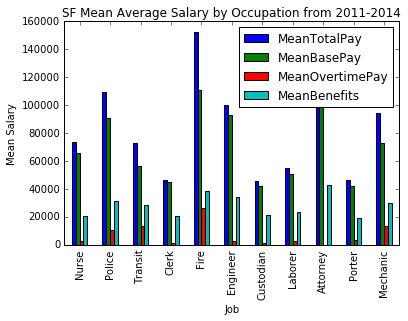

In [11]:
job_categories_df["MeanTotalPay"] = job_categories_df["Jobs"].map(lambda x: salary_by_category(x))
job_categories_df["MeanBasePay"] = job_categories_df["Jobs"].map(lambda x: basepay_by_category(x))
job_categories_df["MeanOvertimePay"] = job_categories_df["Jobs"].map(lambda x: overtime_by_category(x))
job_categories_df["MeanBenefits"] = job_categories_df["Jobs"].map(lambda x: benefits_by_category(x))
job_categories_df.index = job_categories_df["Jobs"]
print(job_categories_df)

job_categories_df.plot(kind = 'bar')
plt.ylabel("Mean Salary")
plt.xlabel("Job")

plt.title("SF Mean Average Salary by Occupation from 2011-2014")
plt.show()


5. How is the average salary changing over time among the different job groups?

In [12]:
highest_pay_jobs = ["Police","Fire","Engineer","Attorney","Mechanic"]

def pivot_occupation_salary(job):
    salary_df = salary[salary["JobCategory"] == job]
    Year_totalPay = pd.DataFrame(salary_df[["Year","TotalPay"]])
    Year_totalPay_pivot = pd.pivot_table(Year_totalPay,index = 'Year',values = ['TotalPay'], aggfunc=np.mean )
    
    return Year_totalPay_pivot

police_pay_year = pivot_occupation_salary("Police")
fire_pay_year =pivot_occupation_salary("Fire")
engineer_pay_year= pivot_occupation_salary("Engineer")
attorney_pay_year=pivot_occupation_salary("Attorney")
mechanic_pay_year = pivot_occupation_salary("Mechanic")

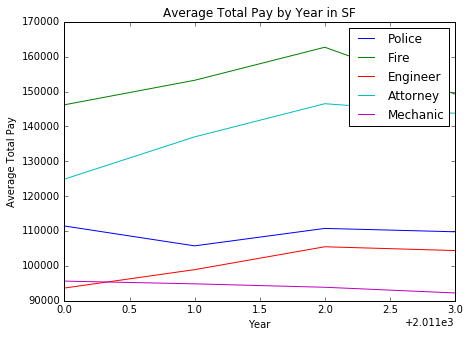

In [13]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
job_pay_year = [police_pay_year,fire_pay_year,engineer_pay_year,attorney_pay_year,mechanic_pay_year]
for pay_year in job_pay_year:
    ax.plot(pay_year.index, pay_year.values)


plt.title('Average Total Pay by Year in SF')
plt.xlabel("Year")
plt.ylabel("Average Total Pay")
plt.legend(labels = highest_pay_jobs)
plt.show()